# Employee Attrition Prediction
Nowadays, firms are expanding at a tremendous rate, and with this mass expansion, experienced professionals are in high demand by the companies. An experienced employee is like an asset to the company; upon losing, companies either try to retain the employee with a revised compensation, or they can always hire a new employee. However, predicting this can save a lot of money and time. Additionally, it will allow the company's management to control a project pipeline efficiently, enabling them to manage the hiring and existing workforce flexibly.

# What is Attrition?

When an employee moves out of the company either voluntarily or involuntarily, it is known as attrition. The attrition rate is calculated as the percent of employees who have left the organization by the average number of employees.

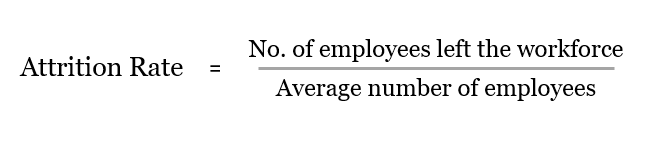

Ideally, the average attrition rate should be less than 10%, and an attrition rate greater than 20% is alarming for any company. Following are some reasons for high attrition rates:
Poor management
Lack of recognition
Toxic work environment 
Lack of career growth

The above list is quite intuitive, and as we start exploring the data, we will find more reasons for attrition. In this blog, we will develop an attrition prediction model, which will help us predict the employees likely to leave the organization in the coming time. We will also provide valuable insights and feedback to the HR & talent-acquisition department that will help prevent attrition in some departments. Let's start with the data analysis:

# Data Analysis
W
e are interested in exploring the exciting patterns that lead to employee attrition. At the end of the analysis, we will try to model employee attrition by predicting the possible attritions using specific machine learning models. We will be using Kaggle's IBM HR Analytics Employee Attrition & Performance dataset for this analysis, and it has 35 features and 1470 rows of employee data. Further, there are no missing values in this dataset. Let's take a look at the data:

In [86]:
import pandas as pd
employee_attrition_data = pd.read_csv('Employee Attrition.csv')
employee_attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The 'Attrition' feature will be our dependent feature, and the rest of the features are independent. Let's visualize the histograms:

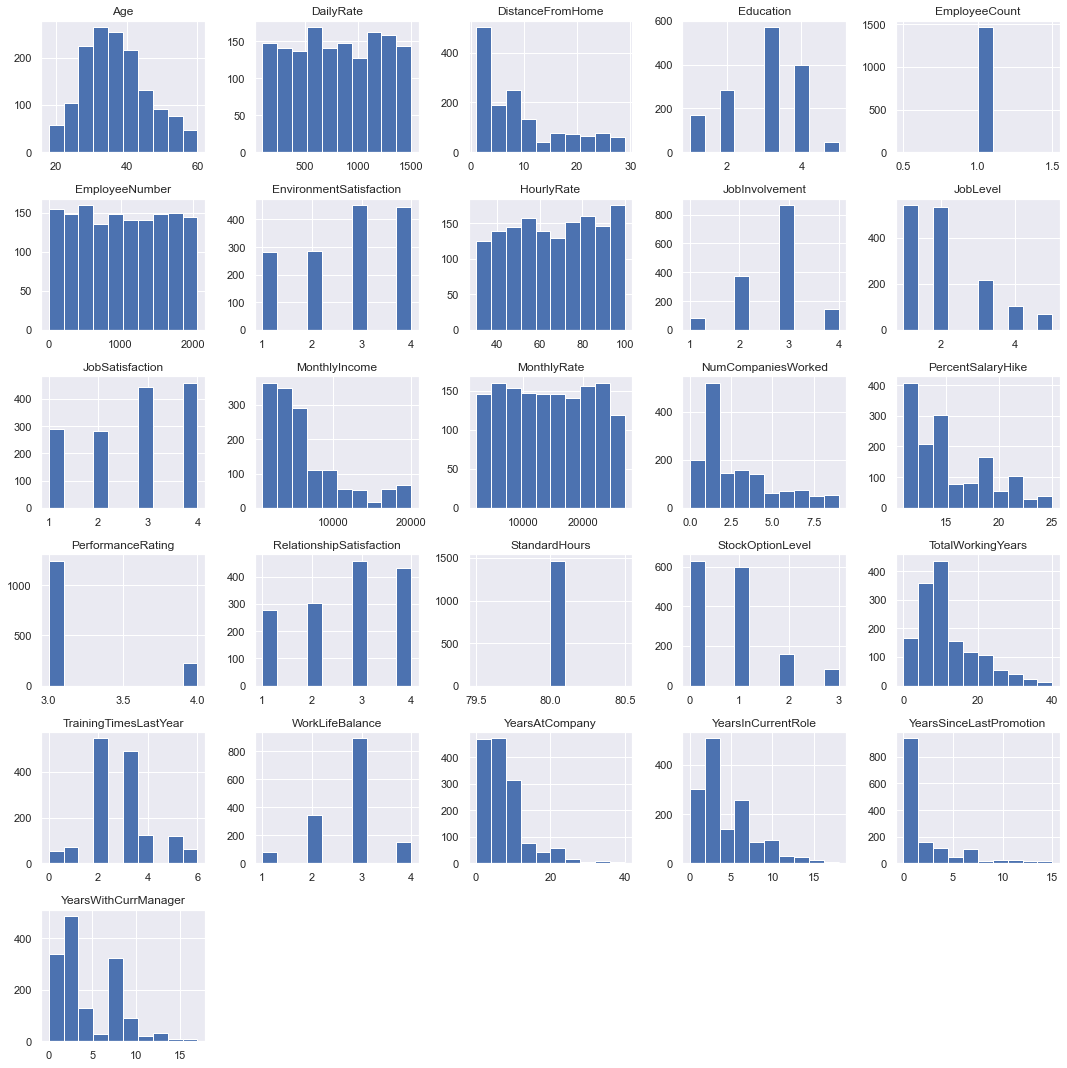

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
employee_attrition_data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

Following are some inferences derived from the above histogram plots:
Most distributions are right-skewed (Monthly Income, Total Working Years, Year at Company, Distance From Home, etc.). They are also tail heavy (Tails are not exponentially bounded). 
The age feature is a little right-skewed, and most of the employees have ages between 25–4o years. 
'Employee Count' and 'Standard Hours' features are redundant and can be removed from the analysis. 

Let's explore the age distribution for ex-employees vs. present employees:

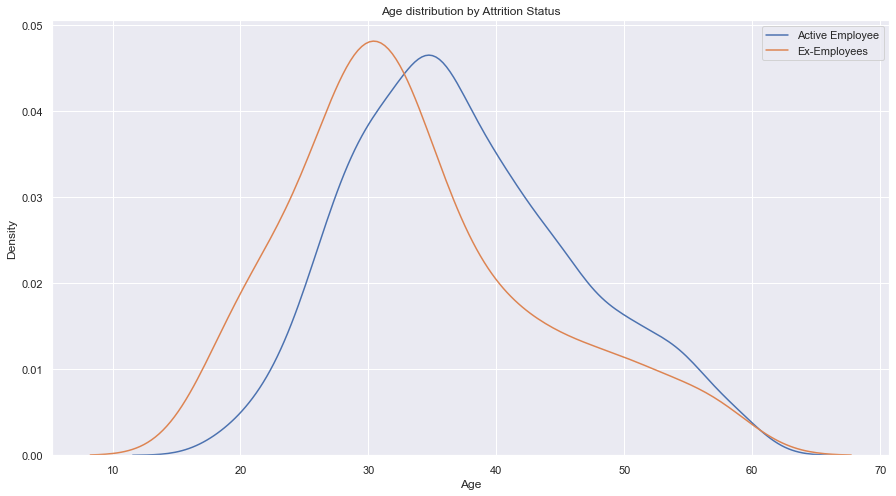

In [88]:
plt.figure(figsize=(15, 8))
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.title('Age distribution by Attrition Status')
plt.legend()
plt.show()

Ex-employees have an average age of 33.5 years, while the current employees have 37.5 years. A younger employee is more likely to leave a company, and the education and marital status parameters are potential support. 
Let's see if salary plays a vital role in attrition:

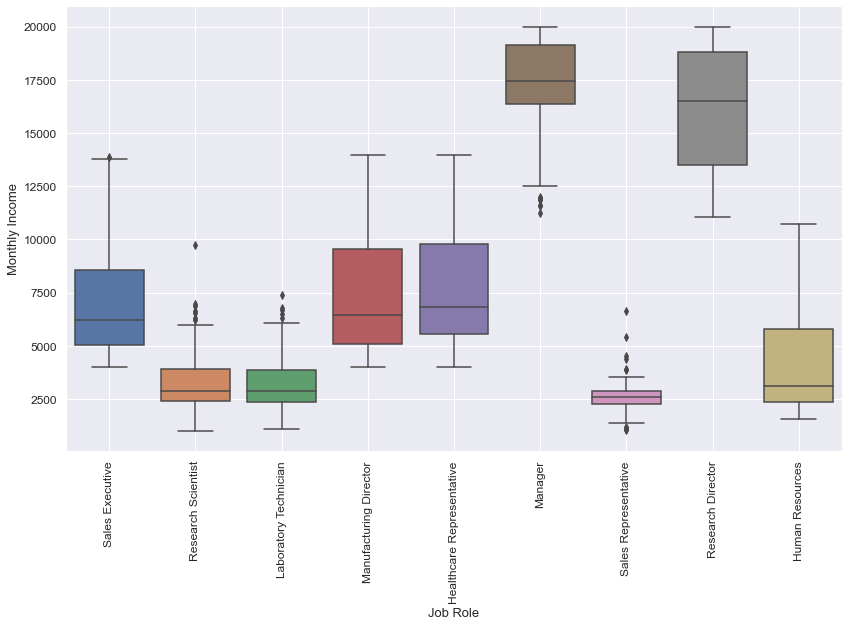

In [89]:
plt.figure(figsize=(12, 7))
sns.boxplot(y=employee_attrition_data["MonthlyIncome"], x= employee_attrition_data["JobRole"])
plt.grid(True, alpha=1)
plt.tight_layout()
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.xlabel("Job Role", size=13)
plt.ylabel("Monthly Income", size=13)
plt.show()

Following are some inferences that we can make from the above boxplot:
Managers and Research directors earn a relatively large sum. Intuitively, the attrition must have an inverse relationship with the monthly income parameter. 
Research Scientist, Lab. Technicians and Sales Representatives positions are not well paid. Such factors would lead to attrition in these departments. However, we need to verify these findings first. 

Let's check the attrition among different departments:

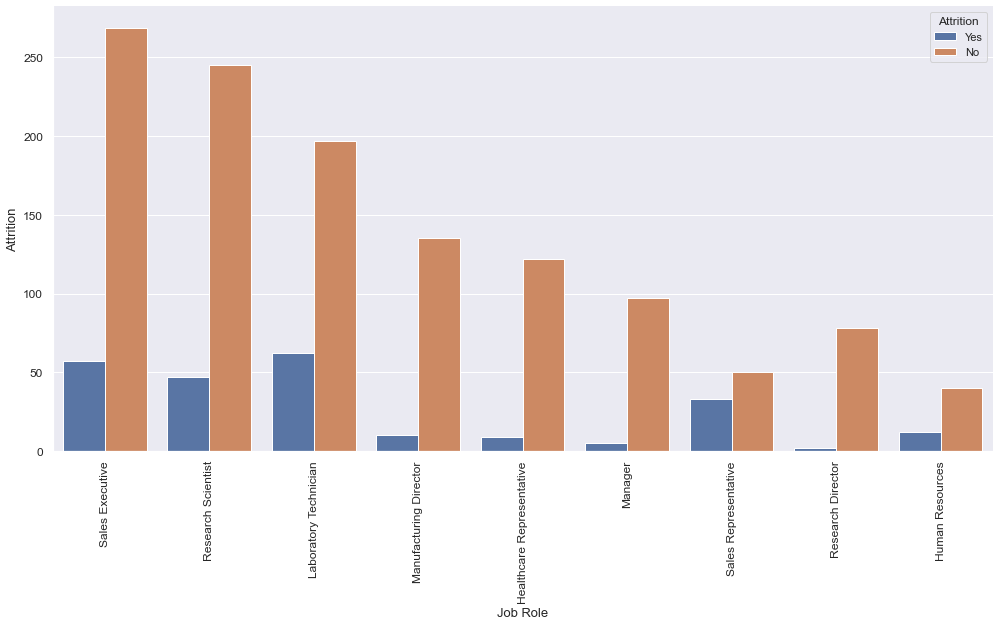

In [90]:
sns.catplot(x='JobRole', hue='Attrition', data=employee_attrition_data, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.xlabel("Job Role", size=13)
plt.ylabel("Attrition", size=13)
plt.show()

As expected, Research Scientist, Lab. Technicians and Sales representatives have high attrition in their department, whereas Managers and Research Directors have little attrition. Low Monthly income is one piece of evidence that supports a high attrition rate. Let's see which department is highly involved in the Overtime.

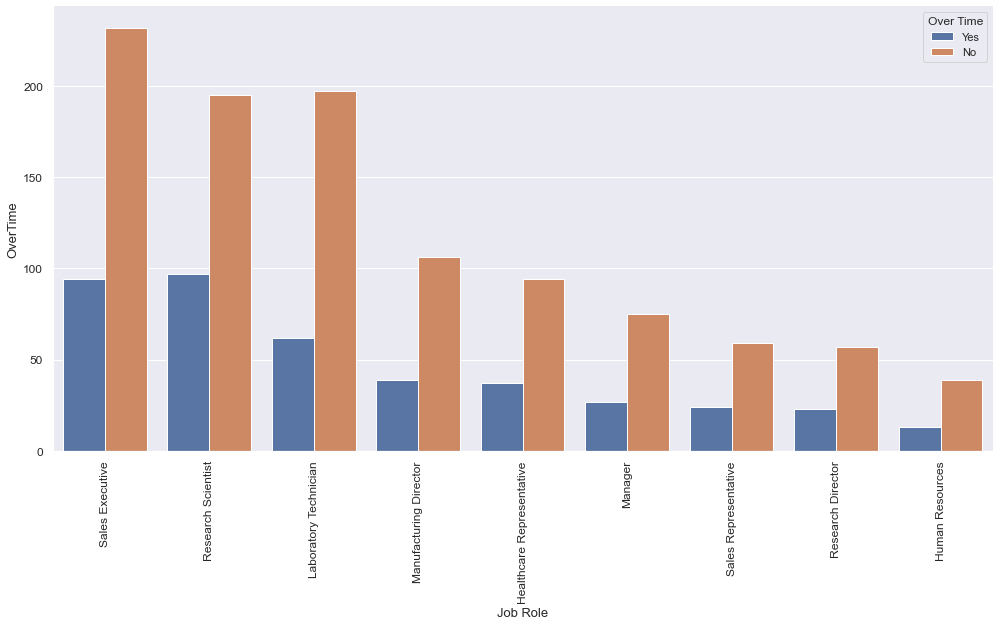

In [91]:
sns.catplot(x='JobRole', hue='OverTime', data=employee_attrition_data, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Over Time')
plt.tight_layout()
plt.xticks(rotation=90, size=12)
plt.yticks(size=12)
plt.xlabel("Job Role", size=13)
plt.ylabel("OverTime", size=13)
plt.show()

With the help of the above plot, we can safely say that Research Scientists and labs. Technicians deserve a raise in compensation, eventually resulting in fewer drop-outs from these departments. Such insights would immensely help in employee retention planning. 
Let's check the overall attritions vs. current employee count:

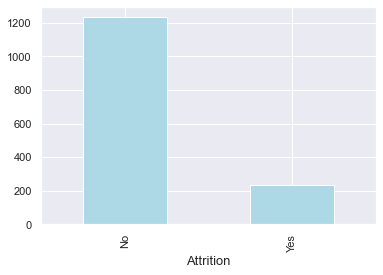

In [92]:
employee_attrition_data['Attrition'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.xlabel('Attrition', size=13)
plt.show()

The dataset is unbalanced but not by far diminishing count. We can counter this with sampling techniques like SMOTE, but let's keep it as homework.

Let's take a look at gender distribution using a Pie Chart.

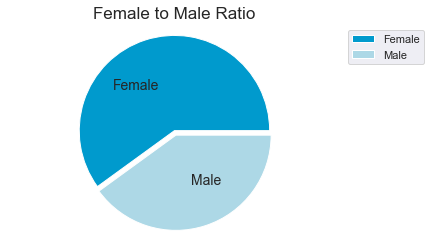

In [93]:
fig, ax = plt.subplots()
labels = ['Female', 'Male']
color_palette_list = ['#009ACD', '#ADD8E6']

percentage = employee_attrition_data['Gender'].value_counts(normalize=True)*100

explode=(0.05,0)
ax.pie(percentage, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], 
       shadow=False, startangle=0,labeldistance=0.5,
       textprops={'fontsize': 14})
ax.axis('equal')
ax.set_title("Female to Male Ratio", fontsize = 17)
ax.legend(bbox_to_anchor=(1, 1));

Let's perform some data type transformation:

In [94]:
employee_attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Some features have an "object" data type, which should be a category instead. Let's convert their data type:

In [95]:
for col in employee_attrition_data.columns:
    if employee_attrition_data[col].dtype == 'object':
        employee_attrition_data[col]= employee_attrition_data[col].astype('category')
        employee_attrition_data[col] = employee_attrition_data[col].cat.codes

Now, we can visualize the correlation between these features:

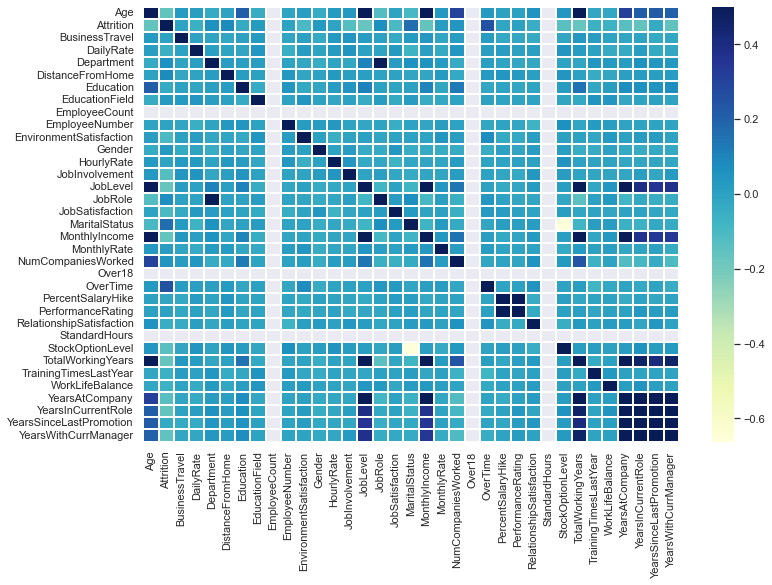

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(employee_attrition_data.corr(), vmax=.5, linewidths=.2, cmap="YlGnBu")
plt.show()

Our target variable (Attrition) negatively correlates with Age, Job Involvement, Job Level, Monthly Income, and Total Working Years, and this aligns well with our previous findings. Further, attrition positively correlates with Distance from Home, Number of companies worked. At the same time, most features have a near-zero absolute correlation; however, this doesn't mean that these features are not significant. Even a little distinction might help classify the attrition, so removing any of the attributes from the analysis is not recommended. It would be a different story if we dealt with a regression problem.

# Conclusion of EDA
We started the analysis by exploring some trends that directly govern the attrition, and we did find some problems related to roles. Let's prepare a feedback list for the HR department based on our findings:
We can conclude that a younger employee is more likely to leave the company from the age distribution because an experienced professional (also married) between 30–40 years of age generally seeks stability in a job. The HR department can develop strategies to retain younger talent, preventing attrition among younger employees.
Attrition among the Research Scientist, Lab. Technicians and Sales representatives are high compared to other departments, justifiable due to their long working hours (over-time) and low monthly income. To prevent attrition in these roles, the HR department should plan a strategy to maintain a healthy work-life balance among these roles and should also revise their compensation with the market standards.

# Attrition Prediction
We are moving back to our primary goal. Predicting the attrition can help in the strategic talent retention, or even a replacement can be held ready if required; following this can save the company a large sum of money since the project pipelines will become flexible and uninterrupted. Let's try to predict attrition based on available attributes. 
Predicting attrition is a supervised binary classification task. Either the employee will leave or stay, and our job is to predict the same using some classification algorithm.  We will stick with the most renowned Logistic Regression algorithm for this analysis because of the following advantages:

* It is easy to interpret and explainable to stakeholders having no technical background.
* Logistic regression is a relatively simple classifier capable of providing real-time predictions making its implementation in small devices feasible.

If you're not familiar with this popular algorithm, please visit our logistic regression blog. Let's start by implementing Logistic Regression, but before that, we need to scale the data and split it into training and testing datasets. Since there's an imbalance in the data, we will reduce some instances by randomly taking out observations belonging to the majority class. 
Logistic regression often provides decent results with no hyper-parameter tuning, but we will implement the Grid-Search-CV for hyper-parameter tuning. This will help us provide the optimum performance parameters which we are receiving. Further, we will be using the ROC-AUC performance metric since we want to add high discrimination power to the model for the two classes and avoid FN and TN. Alternatively, we could have also used the F1 score.

Let's jump onto the implementation:

In [97]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from plot_metric.functions import BinaryClassification as BC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr
from sklearn.metrics import confusion_matrix
# Removing some observations whose class is in majority
# This is an important step to balance the dataset
employee_attrition_data = employee_attrition_data[(employee_attrition_data['Attrition'] != 0) | (np.random.rand(len(employee_attrition_data)) < .33)]

X = employee_attrition_data.drop('Attrition',axis=1)
y = employee_attrition_data['Attrition']
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)
# Data Normalization
scaler = MinMaxScaler(feature_range = (0,1))


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Defining parameters for hyper-parameter tuning
params = {
        'solver': ['newton-cg', 'liblinear'],
        'penalty': ['l2'],
        'C': np.logspace(-4.5,4.5,50),
        'class_weight':['balanced'],
        'tol':[0.0001, 0.001, 0.01, 0.1],
        'fit_intercept':[True, False],
        'intercept_scaling':[1, 2, 3]
}

# Initializing Grid Search with Logistic Regression and keeping roc_auc as the performance metrics!
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1,
                           verbose=0,
                           scoring="roc_auc",
                           return_train_score=True)
# Training
grid_search.fit(X_train, y_train)
# Best Performing Parameter
print('='*20)
print("best params: " + str(grid_search.best_estimator_))
print("best params: " + str(grid_search.best_params_))
print('best score:', grid_search.best_score_)
print('='*20)

best params: LogisticRegression(C=23.853440064314213, class_weight='balanced',
                   intercept_scaling=2, solver='liblinear')
best params: {'C': 23.853440064314213, 'class_weight': 'balanced', 'fit_intercept': True, 'intercept_scaling': 2, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
best score: 0.7781983463726884


Let's evaluate the performance of the model over the testing dataset:

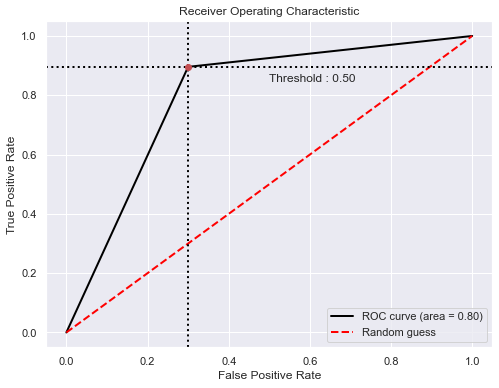

In [98]:
from plot_metric.functions import BinaryClassification as BC
 
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
bc = BC(y_test, y_pred, labels=["Class 1", "Class 2"])
# Plotting AUC_ROC Curve
plt.figure(figsize=(8,6))
bc.plot_roc_curve()
plt.show()

The Area under the ROC curve is a little less than 0.8, suggesting the model has a decent discrimination power for classifying the two classes. Let's have a look at other metrics to confirm the performance of this model:

The accuracy is 0.77
The balanced accuracy is 0.80
The recall is 0.90
The precision is 0.64
The F1 Score is 0.75
The AUC ROC Score is 0.80


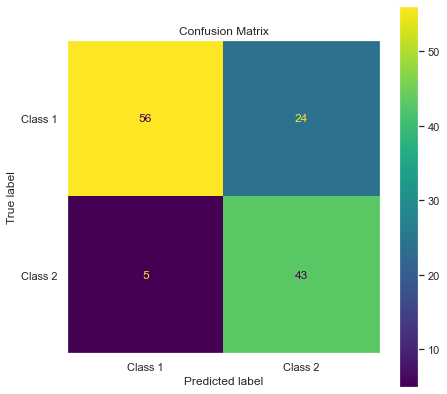

In [102]:
# Performance Evaluation Metrics 

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay


print("The accuracy is {:.2f}".format(accuracy_score(y_test, y_pred)))
print("The balanced accuracy is {:.2f}".format(balanced_accuracy_score(y_test, y_pred)))
print("The recall is {:.2f}".format(recall_score(y_test, y_pred)))
print("The precision is {:.2f}".format(precision_score(y_test, y_pred)))
print("The F1 Score is {:.2f}".format(f1_score(y_test, y_pred)))
print("The AUC ROC Score is {:.2f}".format(roc_auc_score(y_test, y_pred)))
cm = confusion_matrix(y_test,best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Class 1", "Class 2"])
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.grid(None)
plt.show()

Accuracy, Balanced Accuracy, Recall, and AUC_ROC seem promising, but since our data is imbalanced. Generally, accuracy is not the best metric to count on, and it could be deceiving in some cases. However, Recall and AUC_ROC suggest a good fit in this data. Precision is a little on the lower side, and finally, the confusion matrix confirms the presence of false-positive cases, which affects the precision of the model. On the bright side, false negatives are low, so recall is significantly improved.

# Conclusion 
We were able to model the attrition using the robust logistic regression algorithm. However, there's room for improvement, which you can try to tackle as homework. You can try several sampling methods and evaluate the corresponding results, which will allow us to find the optimum sampling technique for this problem. We achieved a decent recall and AUC ROC scores for this problem, suggesting a good fit over the data. Further, we learned how to implement Grid-Search for hyper-parameter tuning in the Binary Classification problem. If you enjoyed this application blog, please let us know.